/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


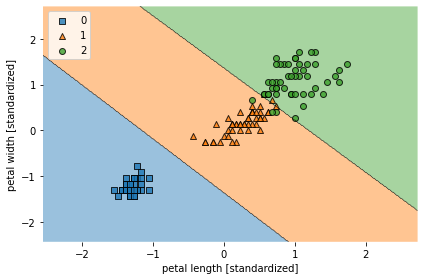

In [1]:
from sklearn import datasets    # importing datasets
import numpy as np              # needed for "X_combined_std" & "y_combined"
import matplotlib.pyplot as plt # plotting purposes 
from sklearn.preprocessing import StandardScaler     # importing Standard Scaler method
from sklearn.model_selection import train_test_split # for split of data
from mlxtend.plotting import plot_decision_regions   # for plot_decision_regions "call" 
from sklearn.svm import SVC     # importing specific method from library


iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) 

sc = StandardScaler() #instance of StandardScaler object
#sc.fit(X_train)       # Using the fit method, StandardScaler estimated the parameters, 𝜇 (sample mean) and 𝜎 (standard deviation), 
                      # for each feature dimension from the "training data". 
    
X_train_std = sc.fit_transform(X_train) # once StandardScaler fitted, we proceed to apply/transform our training data 
                                    # and stored it on new variable.
X_test_std = sc.transform(X_test)   # and same process applied to "test data"

X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train, y_test))


svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined,clf=svm)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Logistic Regression vs. SVMs

In practical classification tasks, linear logistic regression and linear SVMs often yield very similar results. Logistic regression tries to maximize the conditional likelihoods of the training data, which makes it more prone to outliers than SVMs, which mostly care about the points that are closest to the decision boundary (support vectors). On the other hand, logistic regression has the advantage that it is a simpler model and can be implemented more easily. Furthermore, logistic regression models can be easily updated, which is attractive when working with streaming data.


In [0]:
svm.predict(X_test_std[:3, :])

array([2, 0, 0])

In [0]:
svm.predict(X_test_std[0, :].reshape(1, -1))

array([2])

In [0]:
single_manual_input=np.array([-2, -1])

svm.predict(single_manual_input.reshape(1, -1))

array([0])